### О необоходимости использования графиков

Для демонстрации методов машинного обучения часто используют графики. Это связано с их наглядностью.
Посмотри, как оформлены данные о среднемесячной погоде в Москве в таблице и на графике:


![](https://sun9-81.userapi.com/impf/TjbpIYTI6f8gfaCsBCgsyYIUjKd42Hb0wp_13Q/Q2el6Af7IL8.jpg?size=947x495&quality=96&sign=073a201a1e1a26751866a9eac76d5594&type=album)


В таблице заключена текстовая информация, которую необходимо «читать», перемещаясь по строкам и столбцам.

**Графики** — это визуальное представление данных, их можно проанализировать быстрее, чем таблицу. Если тебя попросят назвать самый жаркий месяц, то при помощи графика ты это сделаешь быстрее.
Что если информации станет еще больше? Тогда мы изменим форму самого графика. На смену гистограмме, где у каждого значения был свой столбец, придёт точечная диаграмма. Это позволит охватить больше информации.

In [2]:
import pandas as pd

df_rest = pd.read_csv('https://ai-academy.ru/upload/csv/Restaurant.csv')

In [3]:
df_rest.head()

,total_bill,tip,sex,vegan,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df_rest.shape

(244, 7)

Столбцы "sex",	"vegan",	"day",	time" - являются категориалтными

In [5]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   vegan       244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
import matplotlib.pyplot as plt

#%matplotlib inline #позволяет вам встроить графики прямо внутрь ноутбука, а не в новом окне.

**Гистограмма** — это диаграмма, которая группирует числовые данные в ячейки, отображая их в виде сегментированных столбцов. Они используются для отображения распределения набора данных: как часто значения попадают в диапазоны.

  Гистограмма была впервые введена Карлом Пирсоном.

<Axes: >

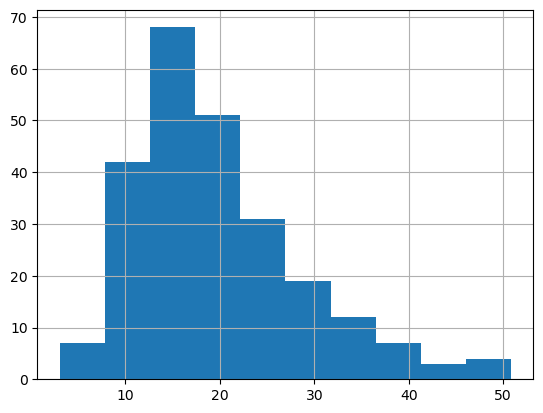

In [7]:
df_rest.total_bill.hist() #сколько данных в диапазоне

<Axes: >

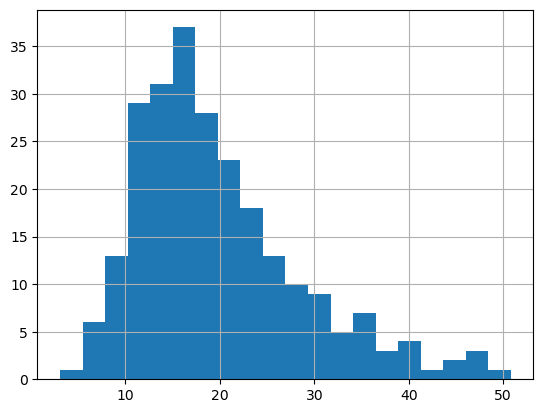

In [8]:
df_rest.total_bill.hist(bins = 20) #bins - число столбцов

Конечно графики можно подписывать, менять параметры отображения и видоизменять их на свео усмотрение для их дальнешего использования в отчетах

Text(0.5, 0, 'Сумма чаевых, USD')

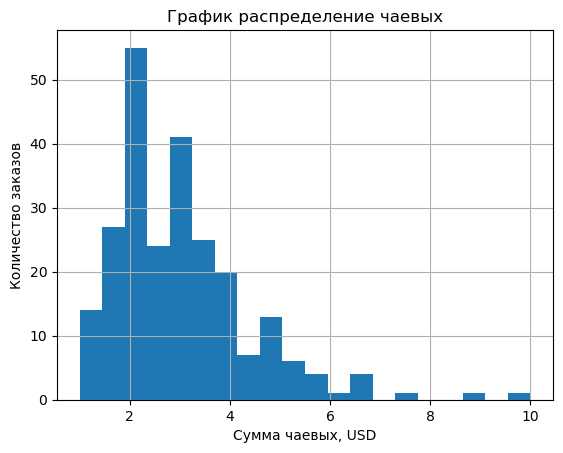

In [9]:
ax = df_rest.tip.hist(bins = 20)

ax.set_title('График распределение чаевых')
ax.set_ylabel('Количество заказов')
ax.set_xlabel('Сумма чаевых, USD')

Графики поддерживают работу с легендой , что дает возможность строить сразу несколько столбцов на одной странице.

           tip  total_bill
day                       
Fri   2.734737   17.151579
Sat   2.993103   20.441379
Sun   3.255132   21.410000
Thur  2.771452   17.682742


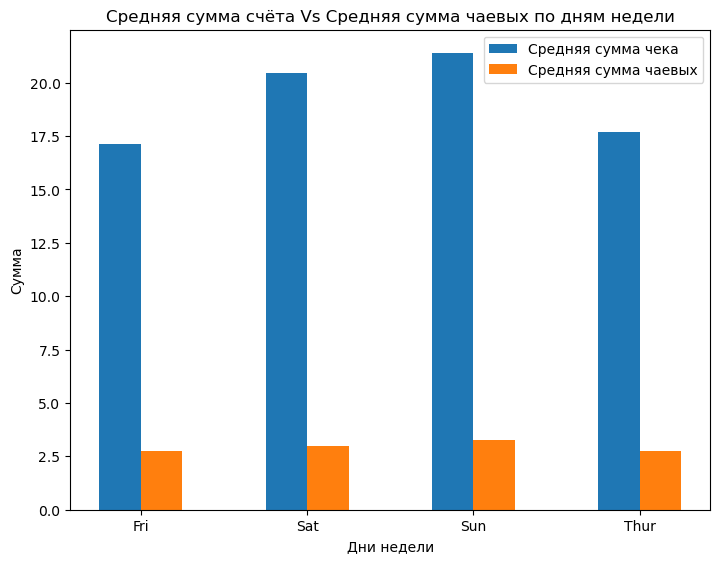

In [10]:
tips=df_rest.pivot_table(values = ['total_bill','tip'],
               index='day')
print(tips)
fig=plt.figure()
axes=fig.add_axes([1,1, 1, 1]) #размеры фигуры: от 0 0 до максимума ВОПРОС!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
x = range(len(tips.index))
axes.bar(x,tips['total_bill'], 
       width=0.25, align='edge', label = 'Средняя сумма чека' )
axes.bar([p + 0.25 for p in x],tips['tip'], 
       width=0.25, align='edge', label = 'Средняя сумма чаевых')
axes.set_title("Средняя сумма счёта Vs Cредняя сумма чаевых по дням недели")
axes.set_xlabel('Дни недели')
axes.set_ylabel('Cyммa')
axes.set_xticks([p + 0.25 for p in x])
axes.set_xticklabels(tips.index) 

axes.legend(loc = 1) #расположение легенды (в правом верхнем углу).

**Точечная диаграмма** — это тип математической диаграммы, использующей декартовы координаты для отображения значений двух переменных для набора данных.

Данные отображаются в виде набора точек, каждая из которых имеет значение одной переменной, определяющей положение на горизонтальной оси, и значение другой переменной для вертикальной оси.

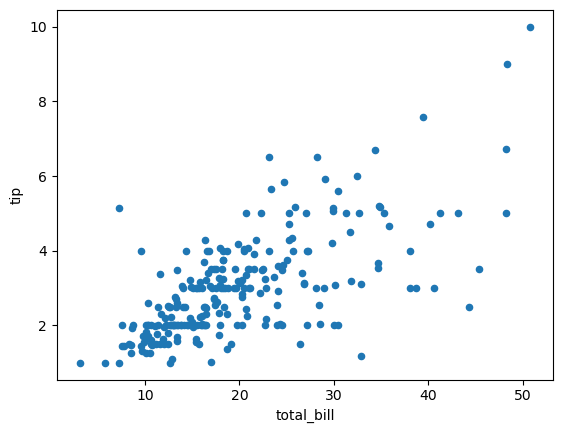

In [11]:
axes = df_rest.plot.scatter("total_bill", "tip")

Text(0, 0.5, 'Размер чаевых')

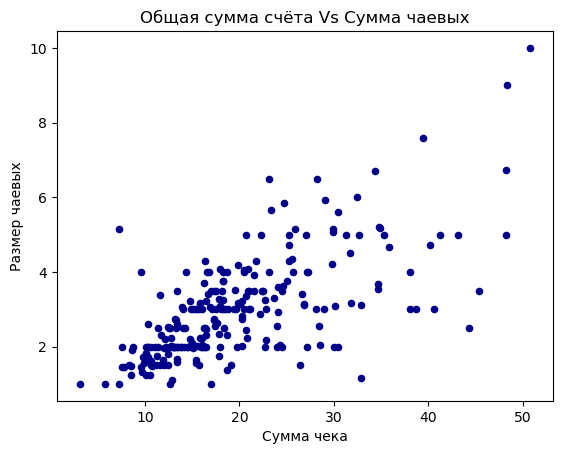

In [12]:
axes = df_rest.plot.scatter("total_bill", "tip", c='DarkBlue')

axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

### Другие формы графиков

**Seaborn** библиотека визуализации вторая по полуряности после matplotlib. Расширяет функционал последней за счет новых типов графиков и дополнительных параметров.



In [13]:
import seaborn as sns

Метод **jointplot()**, чем-то напоминает **scatter**, но помимо расспределния параметров он визуализирует на одном графике гистограммы обоих признаков и показывает связь между ними.

КАК ПАЛКА ЧО ЗНАЧИТ АААААААААААААААААААААААААААААААААААААААААААААААААААА

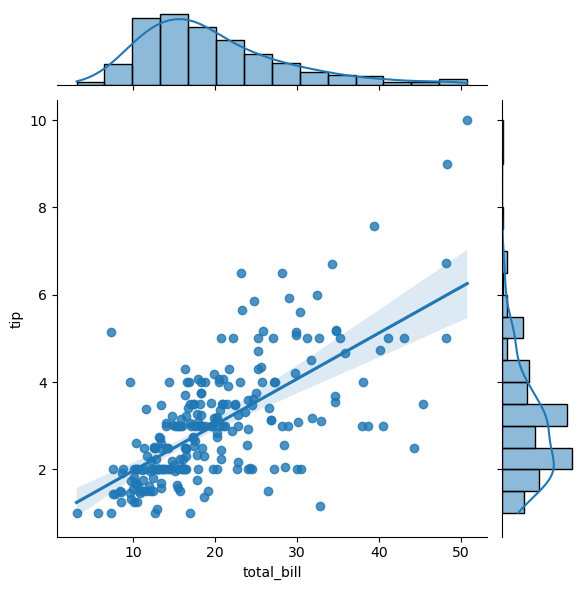

In [14]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df_rest, kind = 'reg')

Продолжим выдвигать необычные гипотезы, проследим за тем как мужчины и женшины оставляют чаевые.

**countplot** - строит гистограмму частоты входа категориального признака в наборе данных.

<Axes: xlabel='sex', ylabel='count'>

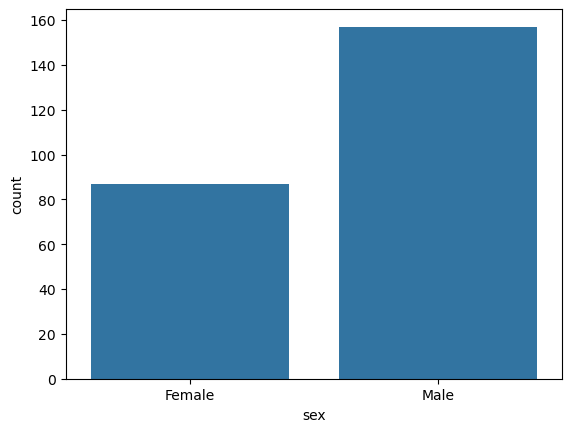

In [15]:
sns.countplot(x = "sex" , data  = df_rest)

**barplot** - представляет собой оценку тенденции для числовой переменной. СРЕДНЕЕ?

<Axes: xlabel='sex', ylabel='tip'>

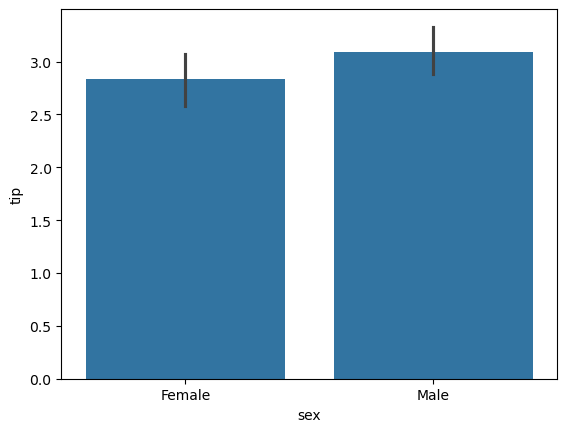

In [16]:
sns.barplot(x = "sex" ,y ="tip" ,  data  = df_rest)

Рассмотрим как обьем чаевых КОЛИЧЕСТВО КЛИЕНТОВ???? ГДЕ ТУТ ЧАЕВЫЕ зависит от дня недели

<Axes: xlabel='day', ylabel='count'>

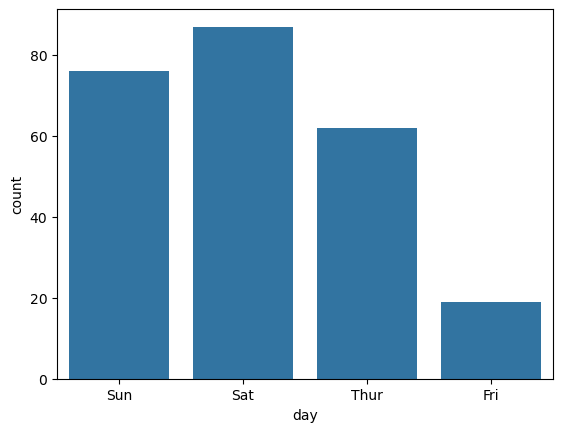

In [17]:
sns.countplot(x = "day" , data  = df_rest)

СРЕДНИЕ ЧАЕВЫЕ В ДЕНЬ??? ЭТО ОБЪЕМ???

<Axes: xlabel='day', ylabel='tip'>

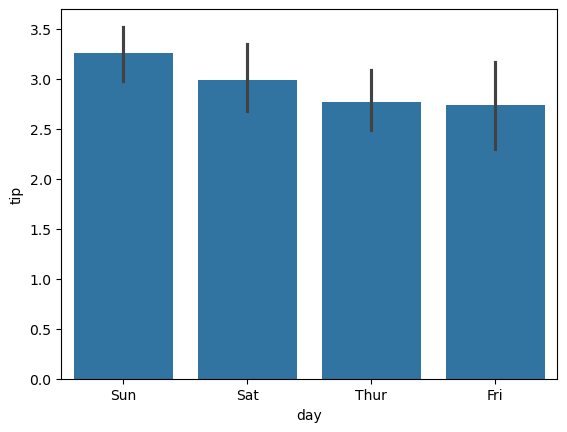

In [18]:
sns.barplot(x = "day" ,y ="tip" , data  = df_rest)

In [19]:
sum(df_rest['tip'] / df_rest.shape[0])

2.9982786885245902

In [20]:
Video_blog_DF = pd.DataFrame({'Duration': [275, 383, 628, 712],
                             'Views': [305, 629, 843, 726],
                             'Likes':[23, 78, 65, 90],
                             'Dislikes':[5, 12, 26, 10],
                             'Comments':[2, 6, 15, 28]})
Video_blog_DF

,Duration,Views,Likes,Dislikes,Comments
0,275,305,23,5,2
1,383,629,78,12,6
2,628,843,65,26,15
3,712,726,90,10,28


In [21]:
Video_blog_DF.iloc[2].values

array([628, 843,  65,  26,  15], dtype=int64)

In [34]:
df_rest[df_rest['tip'] == 0]

,total_bill,tip,sex,vegan,day,time,size
